# Vertical interpolation - Extrapolation options

In [1]:
from nes import *
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

%matplotlib inline

In [2]:
ascendant = True

## Creating base

In [3]:
var_name = 'var1'

In [4]:
lat_orig = 33.0
lon_orig = -15.0
inc_lat = 1.0
inc_lon = 1.0
n_lat = 13
n_lon = 25

nessy = create_nes(info=False, projection='regular', 
                   lat_orig=lat_orig, lon_orig=lon_orig, 
                   inc_lat=inc_lat, inc_lon=inc_lon, 
                   n_lat=n_lat, n_lon=n_lon)

nessy.set_time([datetime(year=1986, month=11, day=29)])
nessy.set_levels({'data': (np.linspace(0, 2*np.pi, 10) * 10) + 100, 'units': 'm'})

In [5]:
if not ascendant:
    nessy.lev['data'] = np.flip(nessy.lev['data'] )
    print(nessy.lev)

In [6]:
nessy.variables[var_name] = {'data': None,
                             'units': 'kg.m-2',
                             'description': 'new variable from scratch',
                             'short_name': 'newvar2',
                            }

# Fill the data
shape = (len(nessy.time), len(nessy.lev['data']), nessy.lat['data'].shape[0], nessy.lon['data'].shape[-1])
nessy.variables[var_name]['data'] = np.zeros(shape)

for y in range(nessy.lat['data'].shape[0]):
    for x in range(nessy.lon['data'].shape[-1]):
        nessy.variables[var_name]['data'][0,:,y,x] = np.sin(nessy.lev['data'] -100) +1

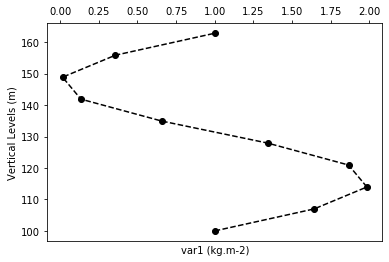

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(nessy.variables[var_name]['data'][0, :, 5, 5], 
        nessy.lev['data'], 
        color='black', marker='o', linestyle='--')

ax.xaxis.tick_top()
ax.set_ylabel("Vertical Levels ({0})".format(nessy.lev['units']))
ax.set_xlabel(var_name + " ({0})".format(nessy.variables[var_name]['units']))

plt.show()

## Extrapolation options

In [11]:
# Do extrapolation below and avobe
# extrapolate = True  
# extrapolate = ('extrapolate', 'extrapolate')

# Do not extrapolate -> below (bottom); avobe (top)
# extrapolate = False
# extrapolate = ('bottom', 'top')  # Same behaviour as extrapolate = False

# Only avobe extrapolation:
extrapolate = ('bottom', 'extrapolate')  # (False, True)
# extrapolate = (False, True)
# extrapolate = (np.nan, 'extrapolate')  # (None, True)
# extrapolate = (None, True)
# extrapolate = (0, 'extrapolate')

# Only below extrapolation:
# extrapolate = ('extrapolate', 'top')  # (True, False)
# extrapolate = ('extrapolate', np.nan)  # (True, None)
# extrapolate = ('extrapolate', 0)

# No extrapolation
# extrapolate = 0  # (0, 0)
# extrapolate = np.nan  # (np.nan, np.nan)

In [12]:
level_list = np.arange(0, 210, 10)
if not ascendant:
    level_list = np.flip(level_list)
level_list

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200])

In [13]:
interp_linear = nessy.interpolate_vertical(level_list, kind='linear', extrapolate=extrapolate)

In [14]:
%time interp_quad = nessy.interpolate_vertical(level_list, kind='quadratic', extrapolate=extrapolate)

CPU times: user 135 ms, sys: 2.57 ms, total: 138 ms
Wall time: 137 ms


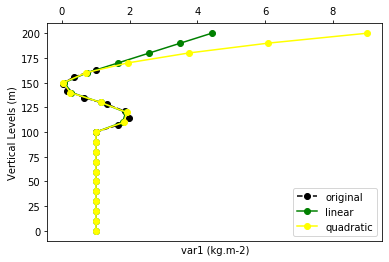

In [15]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(nessy.variables[var_name]['data'][0, :, 5, 5], 
        nessy.lev['data'], 
        color='black', marker='o', linestyle='--', label='original')

ax.plot(interp_linear.variables[var_name]['data'][0, :, 5, 5], 
        level_list, 
        color='green', marker='o', label = 'linear')

ax.plot(interp_quad.variables[var_name]['data'][0, :, 5, 5], 
        level_list, 
        color='yellow', marker='o', label = 'quadratic')

ax.xaxis.tick_top()
ax.set_ylabel("Vertical Levels ({0})".format(nessy.lev['units']))
ax.set_xlabel(var_name + " ({0})".format(nessy.variables[var_name]['units']))

ax.legend()
plt.show()